In [1]:
import numpy as np
from generator import generate_true_calibration_map, generate_binary_label_sequence
from general_methods import isocal, logcal, betacal, sva
from modified_methods import isobins_cp, rcir_cp
from new_methods import htlb_cp, htlb_maxcp
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
lb_map_fixed_perc_100_2000 = np.load("../data/fixed_bound_map_100_2000.npy", allow_pickle=True).item()
lb_map_max = np.load("../data/combined_max_statistic_lower_bound_map_100_2000_M10000_07_09_500.npy", allow_pickle=True).item()["lb_q"]

In [5]:
N = 10000
subsequence_length = 1000
conf = 0.99
true_cal_seed = 5
cal_set_seed = 11

true_cal_map = generate_true_calibration_map(N, true_cal_seed, lowest_prob=0.7, highest_prob=1)
calibration_set_labels = generate_binary_label_sequence(true_cal_map, cal_set_seed)
generated_scores = np.sort(np.random.rand(N))

In [6]:
calibration_maps = {}

calibration_maps['true'] = true_cal_map
calibration_maps['isocal'] = isocal(generated_scores, calibration_set_labels)
calibration_maps['logcal'] = logcal(generated_scores, calibration_set_labels)
calibration_maps['betacal'] = betacal(generated_scores, calibration_set_labels)
calibration_maps['sva'] = sva(generated_scores, calibration_set_labels)
calibration_maps['isobins_cp'] = isobins_cp(calibration_set_labels, conf=conf)
calibration_maps['rcir_cp'] = rcir_cp(generated_scores, calibration_set_labels, credible_level=conf)
calibration_maps['htlb_cp'] = htlb_cp(calibration_set_labels, subsequence_length=subsequence_length, confidence=conf)
calibration_maps['htlb_maxcp'] = htlb_maxcp(calibration_set_labels, lb_map_fixed_perc_100_2000, lb_map_max, window_size=2000, w_min=100)

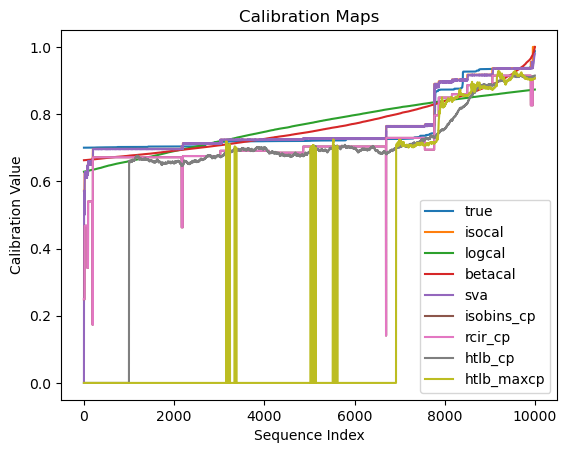

In [7]:
# plot all the calibration maps in one figure

# Get the keys and values from the calibration_maps dictionary
keys = calibration_maps.keys()
values = calibration_maps.values()

# Plot each sequence in the calibration maps
for key, value in zip(keys, values):
    plt.plot(value, label=key)

# Set the x-axis label
plt.xlabel('Sequence Index')

# Set the y-axis label
plt.ylabel('Calibration Value')

# Set the title of the plot
plt.title('Calibration Maps')

# Add a legend
plt.legend()

# Show the plot
plt.show()